**Introduccion a la Ciencia de los Datos**

**Presentado por:** Giovany Sebastian Muñoz Santacruz, 1085331991

**Profesor:** Julian David Echeverry Correa, Ph.D.

**Contacto:** sebastian.munoz@utp.edu.co

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("C:/Users/Sebastian/OneDrive/Escritorio/Notebook/train.csv", sep = ",")

In [5]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Describa brevemente que tipos de datos contiene y qué fenómeno está describiendo.**

Ahora que ya hemos confirmado que nuestros datos han cargado correctamente, procedemos a explicar los tipos de datos que tenemos.
Para empezar, nuestra base de datos es acerca de polizas de seguros en accidentes de autos, en donde podemos ver el año, la licencia de conducción, si es hombre o mujer, si se obtuvo respuesta, si el vehiculo sufrio daño, codigo de region, si estaba previamente asegurado... Cada uno de estos atributos esta definido por un atributo ya sea de tipo flotante o tipo booleno

**Identifique si sus datos son estructurados o no estructurados. ¿En que tipo de archivo están contenidos sus datos? ¿Es necesario el  ́
empleo de un parser para extraer la informacion?**

El tipo de datos que estamos manejando son de tipo estructurado, ya que estan bien definidos sus parametros de longitud, formato y tamaño de los datos. No fue necesario un parser pero si se hizo al comienzo, un arreglo en la separación de los datos que contenia el archivo, en este caso se uso la coma (,). Nuestros datos están contenidos en un .csv

**Identifique cuales de sus variables son de tipo cuantitativo (cuántas son continuas y discretas) y cuáles son de tipo cualitativo (cuantas nominales y ordinales).**

Las variables de tipo cualitativo que tenemos son:

    *Gender (nominal)
    *Vehicle_Damage (nominal)
    *Vehicle_Age (ordinal)
    *Previously_Insured (nomial)
    *Driving_License (nominal)
    *Response (ordinal)

Las variables de tipo cuantitativo que tenemos son: 

    *Age (continua)
    *Policy_Sales_Channel (Discreta)
    *Region_Code (continua)	
    *Annual_Premium (Continua)
    *Vintage (Continua)

In [6]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
data = data.drop(["Vehicle_Age"], axis = 1)

Hemos limpiado nuestra base de datos eliminando la columna Vehicle_Age ya que en nuestra análisis no era de utilidad.

**Realice un analisis univariado para cada uno de los atributos de su base de datos. Calcule la media y la varianza y grafíquelas.
(Ver comandos mean, var y plot de MatLab) ¿Que puede inferir a partir de dichos valores con respeto al problema de interés de su base de datos? Emplee histogramas y box-plots en este analisis.**

Con la linea de codigo 5, hemos hecho un análisis univariado a todas nuestras columnas numericas, de esta forma podemos comprobar que en cada columna tenemos los mismos valores, por lo cual no tendremos valores faltantes. También nos ha entregado la media y la varianza de cada una de las columnas de nuestra base de datos, así como también nos ha entregado el valor minimo, valor maximo y los cuartiles correspondientes.

A continuación mostraremos los respectivos gráficos.

## Histogramas de frecuencias

Antes de continuar vamos a convertir las variables de tipo object a variable booleana 

In [8]:
def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix = var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy], axis = 1)
    return df

In [9]:
createDummies(data, "Gender")

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male
0,1,44,1,28.0,0,Yes,40454.0,26.0,217,1,0,1
1,2,76,1,3.0,0,No,33536.0,26.0,183,0,0,1
2,3,47,1,28.0,0,Yes,38294.0,26.0,27,1,0,1
3,4,21,1,11.0,1,No,28619.0,152.0,203,0,0,1
4,5,29,1,41.0,1,No,27496.0,152.0,39,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,No,30170.0,26.0,88,0,0,1
381105,381106,30,1,37.0,1,No,40016.0,152.0,131,0,0,1
381106,381107,21,1,30.0,1,No,35118.0,160.0,161,0,0,1
381107,381108,68,1,14.0,0,Yes,44617.0,124.0,74,0,1,0


Text(0.5, 1.0, 'Edad de las personas en la base de datos')

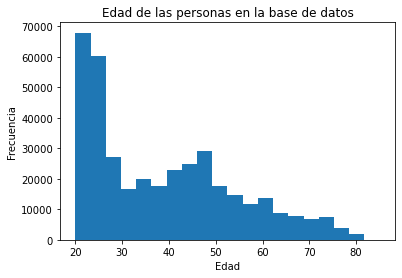

In [10]:
k = int(np.ceil(1 + np.log2(381109)))
plt.hist(data["Age"], bins = k)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Edad de las personas en la base de datos")

Text(0.5, 1.0, 'Licencia de conducción en la base de datos')

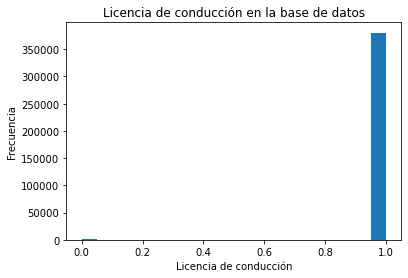

In [11]:
k = int(np.ceil(1 + np.log2(381109)))
plt.hist(data["Driving_License"], bins = k)
plt.xlabel("Licencia de conducción")
plt.ylabel("Frecuencia")
plt.title("Licencia de conducción en la base de datos")

Text(0.5, 1.0, 'Codigo de la region en la base de datos')

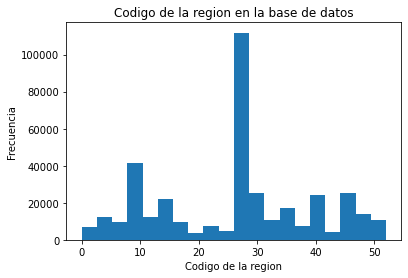

In [12]:
k = int(np.ceil(1 + np.log2(381109)))
plt.hist(data["Region_Code"], bins = k)
plt.xlabel("Codigo de la region")
plt.ylabel("Frecuencia")
plt.title("Codigo de la region en la base de datos")

Text(0.5, 1.0, 'Previamente asegurado en la base de datos')

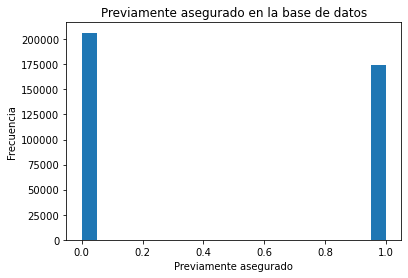

In [13]:
k = int(np.ceil(1 + np.log2(381109)))
plt.hist(data["Previously_Insured"], bins = k)
plt.xlabel("Previamente asegurado")
plt.ylabel("Frecuencia")
plt.title("Previamente asegurado en la base de datos")

Text(0.5, 1.0, 'Premio anual en la base de datos')

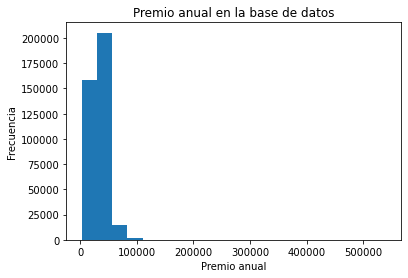

In [14]:
k = int(np.ceil(1 + np.log2(381109)))
plt.hist(data["Annual_Premium"], bins = k)
plt.xlabel("Premio anual")
plt.ylabel("Frecuencia")
plt.title("Premio anual en la base de datos")

Text(0.5, 1.0, 'Canal de ventas en la base de datos')

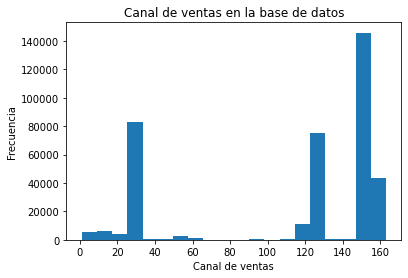

In [15]:
k = int(np.ceil(1 + np.log2(381109)))
plt.hist(data["Policy_Sales_Channel"], bins = k)
plt.xlabel("Canal de ventas")
plt.ylabel("Frecuencia")
plt.title("Canal de ventas en la base de datos")

Text(0.5, 1.0, 'Vintage en la base de datos')

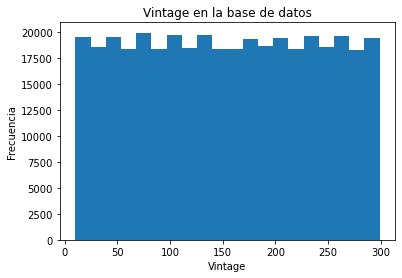

In [16]:
k = int(np.ceil(1 + np.log2(381109)))
plt.hist(data["Vintage"], bins = k)
plt.xlabel("Vintage")
plt.ylabel("Frecuencia")
plt.title("Vintage en la base de datos")

Text(0.5, 1.0, 'Respuesta en la base de datos')

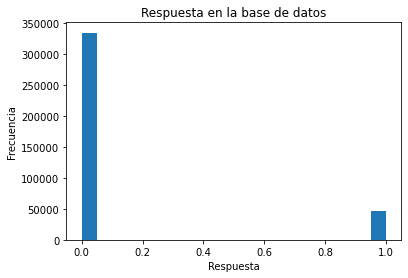

In [17]:
k = int(np.ceil(1 + np.log2(381109)))
plt.hist(data["Response"], bins = k)
plt.xlabel("Respuesta")
plt.ylabel("Frecuencia")
plt.title("Respuesta en la base de datos")

Text(0.5, 1.0, 'Genero en la base de datos')

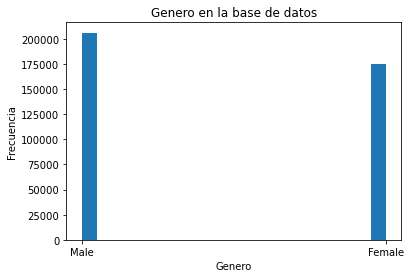

In [18]:
k = int(np.ceil(1 + np.log2(381109)))
plt.hist(data["Gender"], bins = k)
plt.xlabel("Genero")
plt.ylabel("Frecuencia")
plt.title("Genero en la base de datos")

Text(0.5, 1.0, 'Daño del vehículo en la base de datos')

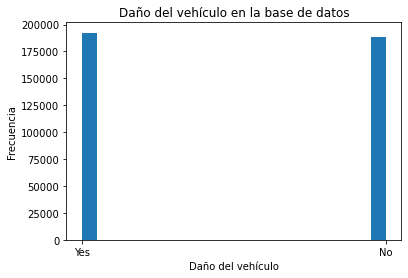

In [19]:
k = int(np.ceil(1 + np.log2(381109)))
plt.hist(data["Vehicle_Damage"], bins = k)
plt.xlabel("Daño del vehículo")
plt.ylabel("Frecuencia")
plt.title("Daño del vehículo en la base de datos")

## Blox-plots

Ahora haremos una visualización con bloxplots para luego contrastar la información

Text(0.5, 1.0, 'Boxplot de la edad en la base de datos')

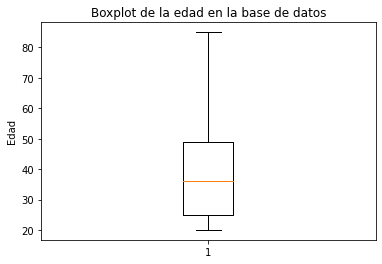

In [20]:
plt.boxplot(data["Age"])
plt.ylabel("Edad")
plt.title("Boxplot de la edad en la base de datos")

In [21]:
data["Age"].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Boxplot del codigo de la region en la base de datos')

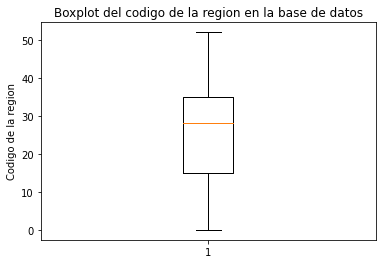

In [22]:
plt.boxplot(data["Region_Code"])
plt.ylabel("Codigo de la region")
plt.title("Boxplot del codigo de la region en la base de datos")

In [23]:
data["Region_Code"].describe()

count    381109.000000
mean         26.388807
std          13.229888
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Region_Code, dtype: float64

Text(0.5, 1.0, 'Boxplot del canal de ventas en la base de datos')

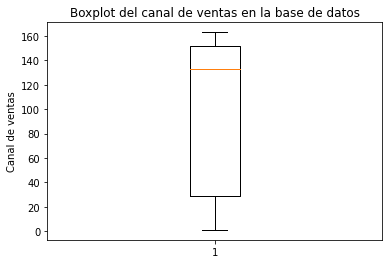

In [24]:
plt.boxplot(data["Policy_Sales_Channel"])
plt.ylabel("Canal de ventas")
plt.title("Boxplot del canal de ventas en la base de datos")

In [25]:
data["Policy_Sales_Channel"].describe()

count    381109.000000
mean        112.034295
std          54.203995
min           1.000000
25%          29.000000
50%         133.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64

Text(0.5, 1.0, 'Boxplot de respuestas en la base de datos')

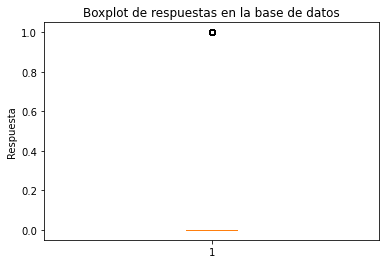

In [26]:
plt.boxplot(data["Response"])
plt.ylabel("Respuesta")
plt.title("Boxplot de respuestas en la base de datos")

In [27]:
data["Response"].describe()

count    381109.000000
mean          0.122563
std           0.327936
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Response, dtype: float64

Text(0.5, 1.0, 'Boxplot de Annual_Premium en la base de datos')

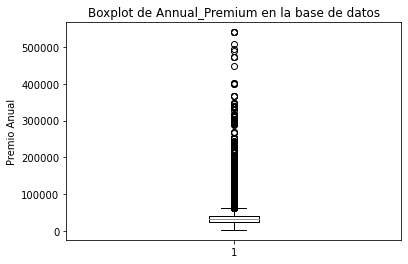

In [57]:
plt.boxplot(data["Annual_Premium"])
plt.ylabel("Premio Anual")
plt.title("Boxplot de Annual_Premium en la base de datos")

Después de analizar los histogramas y los boxplot y teniendo en cuenta que queremos ver en donde se registran la mayoria de cobros a la aseguradora cuando se realiza cobros por accidente, podemos ver que nos es indiferente si es hombre o mujer quien conducia, también que la mayoria que solicita el seguro se centra en un rango de edad de entre los 25 y los 49 años de edad; además, que vemos un alto concentramiento en la región 28, con lo cual habría que centrarse en porque en esa región ocurre la mayoria de los accidentes que se solictan a la aseguradora.

**Seleccione al menos una variable categorica y realice la tabla de frecuencias que la describa (emplee igualmente un pie chart y un bar chart en esta descripcion).**

Para este punto volvemos a tomar la variable catagorica Gender, con lo cual replicamos el codigo de la linea 20 para ver su tabla de frecuencias.

Text(0.5, 1.0, 'Genero en la base de datos')

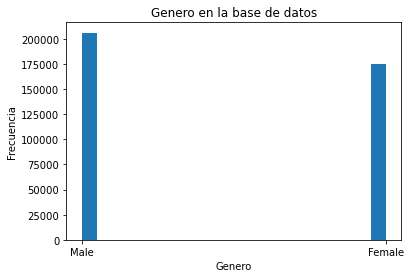

In [37]:
k = int(np.ceil(1 + np.log2(381109)))
plt.hist(data["Gender"], bins = k)
plt.xlabel("Genero")
plt.ylabel("Frecuencia")
plt.title("Genero en la base de datos")

Ahora, procedemos a aplicar un pie char para tener una mejor visualización de esta variable

**Seleccione varias variables numericas y calcule para cada una de ellas los descriptores estadísticos vistos en clase. Comparelos ¿Hay algo que pueda concluir al respecto?**

Para este apartado hemos sellecionado las variables de 'Age', 'Region_Code', 'Policy_Sales_Channel' y la variable 'Response', con lo cuál, como hemos visto en la sección de boxplot, vamos a calcular para cada uno la media, la desviación estandar, los cuantiles, entre otros. 

In [43]:
#Empezamos con la variable 'Age'
data["Age"].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [45]:
#Seguimos con la variable 'Region_Code'
data["Region_Code"].describebe()

count    381109.000000
mean         26.388807
std          13.229888
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Region_Code, dtype: float64

In [46]:
#Continuamos con la variable 'Policy_Sales_Channel'
data["Policy_Sales_Channel"].describe()

count    381109.000000
mean        112.034295
std          54.203995
min           1.000000
25%          29.000000
50%         133.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64

In [47]:
#Finalizamos con la variable 'Response'
data["Response"].describe()

count    381109.000000
mean          0.122563
std           0.327936
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Response, dtype: float64

Como mencionamos anteriormente, vemos una tendencia de accidentes en la región 28 del país, además que vemos que la mayoria son personas entre 25 y 49 año y, dado que la respuesta de la aseguradora fue muy poca, se puede tener una idea del motivo de los accidentes, como que posiblemente la región 28 sea un sector de rumba con lo cual estas personas tienden a conducir en condiciones de alcohol, o que posiblemente en la región no hay buena señalización y que el mal clima sea un factor fundamental en los accidentes. De todos modos estas son suposiciones de momento, y hasta no tener un análisis más profundo de los datos que poseemos no podemos afirmar o negar nada

**Matlab posee la función isoutlier, la cual encuentra valores atıpicos en arreglos de datos. Esta funcion puede implementarse empleando cinco metodos diferentes (MEDIAN, MEAN, QUARTILES, GRUBBS, GESD). Investigue en que consiste cada uno de  ́
estos metodos y empléelos para encontrar valores atıpicos en cada una de las variables de su base de datos. Compare las diferencias entre los distintos metodos.**

**Outlier:** los outliers en nuestro dataset serán los valores que se “escapan al rango en donde se concentran la mayoría de muestras”.

**Median:** La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.

**Mean:** La media aritmética se define como la suma de N elementos dividida entre N. Se trata una medida bastante conocida entre la gente, aunque tiene el inconveniente de que es muy susceptible a valores extremos.

**QUARTILES:** Son cuantiles que se multiplican por un cuarto de un conjunto de datos. La diferencia entre el tercer cuartil y el primero se conoce como rango intercuartílico. Se representa gráficamente como la anchura de las cajas en los llamados diagramas de cajas.

**Grubbs:** Aplica la prueba de Grubbs para valores atípicos, que elimina un valor atípico por iteración según la prueba de hipótesis. Este método asume que los datos de 'A' se distribuyen normalmente.

**Gesd:** Aplica la prueba de desviación estudentizada extrema generalizada para valores atípicos. Este método iterativo es similar 'grubbs', pero puede funcionar mejor cuando hay varios valores atípicos que se enmascaran entre sí.

Las definiciones Grubbs y Gesd son de la pagina de Matlab, con lo cual se verá si estas funciones tienen similitud con alguna librería de python que ejecute este mismo proceso para el proceso de los outliers.

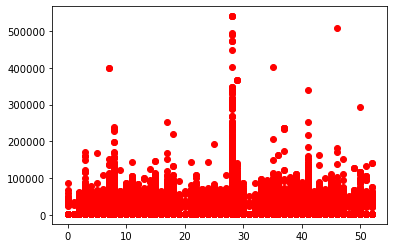

In [79]:
#Empezaremos con la visualización de los outliers
plt.plot(data["Region_Code"], data["Annual_Premium"], "ro")

**Seleccione una variable numerica de su base datos (preferiblemente una que usted considere que puede ser una variable tipo target). Realice la transformacion de dicha variable en variable discreta (discretización). Realice este procedimiento de forma supervisada y no supervisada. Concluya respecto a los resultados.**

Para ejercicio hemos selecionado la variable 'Region_Code'

Text(0.5, 1.0, 'Codigo de la region en la base de datos')

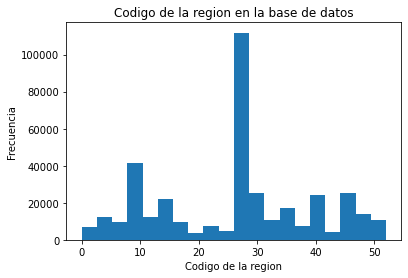

In [61]:
#Cuando realizamos el punto de los histogramas, hicimos una discretización no supervisada
k = int(np.ceil(1 + np.log2(381109)))
plt.hist(data["Region_Code"], bins = k)
plt.xlabel("Codigo de la region")
plt.ylabel("Frecuencia")
plt.title("Codigo de la region en la base de datos")

**Emplee varias estrategias para resolver el problema de los valores faltantes (missing values).**

Como ya se dijo con anterioridad, nuestra base de datos no posee datos faltantes, y esto lo sabemos porque no tenemos ningun atributo N/A por ejemplo, en ninguna fila ni columna. Pero confirmar esto y que no nos equivoquemos lo vamos a comporbar con la siguiente expresión

In [62]:
pd.notnull(data["Age"]).values.ravel().sum()

381109

In [63]:
pd.isnull(data["Age"]).values.ravel().sum()

0

Como podemos ver, en la columna 'Age' no tenemos faltantes, y podemos ver que esto se extiende por todas las columnas de nuestro data set. Podemos repetir el proceso para cada columna, pero en lugar de eso, vamos a ver la descripción de todo el dataset y veremos que si todas tienen "381109" valores, entonces no hay datos faltantes

In [67]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Como podemos ver, todas nuestras variables numéricas poseen el mismo valor, por lo cual confirmamos que nuestro dataset, no es necesario realizar alguna estrategia para resolverlo.
Pero vamos a suponer que nos hubieran faltado, para esto podriamos haber optado por borrar las filas que tengan algún valor faltante con el siguiente codigo (El codigo solo será documentado para evitar algún desastre):

#data.dropna(axis = 0, how = "any")

El metodo anterior es muy drastico, con lo cual dejaré este metodo que puede ser más accesible, el cual es que si tuvieramos un valor faltante lo vamos a rellenar con un cero (0):

#data.fillna(0)

Pero la mejor opción, es rellenar los valores faltantes con su promedio, en este caso veremos como si estuvieramos rellenando los valores de la columna 'Age':

#data["Age"].fillna(data["Age"].mean())

**Mediante un scatter plot analice de manera visual la forma en la que se relacionan dos o mas variables numéricas de su base de datos. Puede hacer tantos scatter plots como considere para que queden analizadas todas las variables de su base de datos.
Intente concluir respecto a esa relacion: las variables bajo estudio, ¿están correlacionadas positivamente? ¿están correlacionadas negativamente? ¿son independientes?**

## ScatterPlot 

<AxesSubplot:xlabel='Region_Code', ylabel='Annual_Premium'>

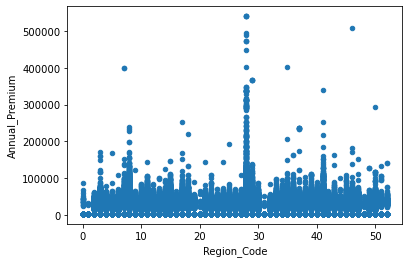

In [70]:
#Vamos a empezar a relacionar las variables 'Annual_Premium' y 'Region_Code'
data.plot(kind = "scatter", x = "Region_Code", y = "Annual_Premium")

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Age'>

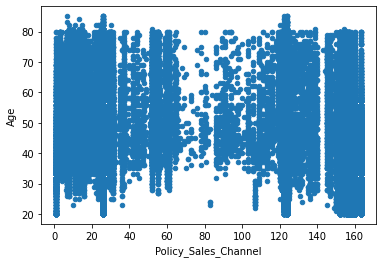

In [74]:
#Analizamos las variables 'Policy_Sales_Channel' y 'Age'
data. plot(kind = 'scatter', x='Policy_Sales_Channel', y='Age')

<AxesSubplot:xlabel='Vintage', ylabel='Annual_Premium'>

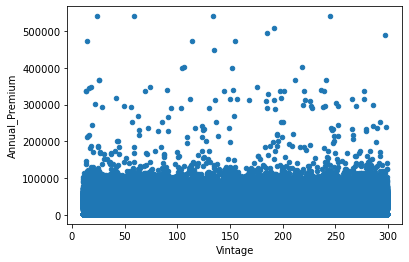

In [76]:
#Analizamos por ultimo las variables 'Vintage' y 'Annual_Premium'
data.plot(kind = 'scatter', x = 'Vintage', y = 'Annual_Premium')

<AxesSubplot:xlabel='Region_Code', ylabel='Age'>

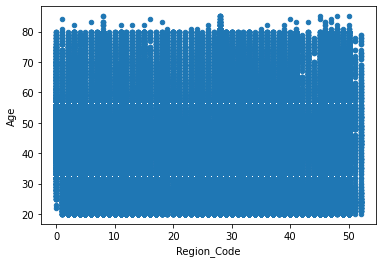

In [77]:
data.plot(kind= 'scatter', x = 'Region_Code', y = 'Age')

Analizando cada una de las variables, vemos una correlación positiva en lo que habíamos intuido es en el análisis de las variables de 'Region_Code' y 'Annual_Premium', del cuál podemos decir que en la region 28 es donde también se presenta un mayor pago de la prima anual. En nuestro análisis de la base de datos, vamos a tener muy en cuenta estas dos variables.
Con respecto a los otros dos scatterplots, decimos que no tenemos una correlación positiva; en el caso de la relación de 'Age' y 'Policy_Sales_Channel' no es que podamos concluir mucho, solo que es irrelevante la edad a la hora de solicitar un seguro para el vehículo y con la relación 'Vintage' y 'Annual_Premium' solo vemos que la prima anual y el tiempo de vida del vehículo no tienen mucho que ver, es más, podemos alrededor de 12 outliers en este sccatter plot.

**Encuentre las dos variables numericas con la correlación más alta y genere un modelo de regresión lineal. ¿Este modelo le valdría como un modelo de prediccion? ¿Cómo cree que podría usarlo? Intente hacer la prediccion para un valor cualquiera y calcule el error de estimacion de su modelo. ¿Cómo cree que podrıa mejorarlo?**

Bueno, como dijimos anteriormente, las dos variables con correlación más alta son 'Region_Code' y 'Annual_Premium', con lo cuál con estas dos variables numéricas vamos a realizar un modelo de regresión lineal.

**Calcule el ındice de correlacion para todas sus variables numéricas ¿Coincide este ındice con las conclusiones que obtuvo en el punto anterior?**



In [111]:
data["Corrn"] = (data["Annual_Premium"] - np.mean(data["Annual_Premium"]))* (data["Region_Code"] - np.mean(data["Region_Code"]))

In [112]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,RC_pred,RSE,Corrn
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,26.313892,2.842960,15934.067108
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,26.369236,546.121191,-69502.423752
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,26.331172,2.784987,12453.891095
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,26.408572,237.424091,29937.225590
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,26.417556,212.647673,-44832.831142


In [114]:
data["corr1"] = (data["Annual_Premium"] - np.mean(data["Annual_Premium"]))**2

In [115]:
data["corr2"] = (data["Region_Code"] - np.mean(data["Region_Code"]))**2

In [117]:
corr_pearson = sum(data["Corrn"])/np.sqrt(sum(data["corr1"]) * sum(data["corr2"]))

In [118]:
corr_pearson

-0.010587510078885172

In [125]:
def corr_coeff(df, var1, var2):
    df["Corrn"] = (df[var1] - np.mean(df[var1]))* (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var1]))**2
    corr_p = sum(df["Corrn"])/ np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p

In [129]:
corr_coeff(data, "Region_Code", "Annual_Premium")

-0.005198790215106135

In [130]:
cols = data.columns.values

In [ ]:
for x in cols:
    for y in cols:
        print(x + ", "+ y + ", " + str(corr_coeff(data, x, y)))

In [134]:
data.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,RC_pred,RSE,Corrn,corr1,corr2
id,1.000000e+00,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368,-0.003027,-0.000093,7.860211e-16,7.860211e-16,7.860211e-16
Age,1.561212e-03,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147,-0.067507,-0.119211,4.137432e-04,4.137432e-04,4.137432e-04
Driving_License,-5.635246e-04,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155,0.011906,0.007214,6.643512e-04,6.643512e-04,6.643512e-04
Region_Code,-5.721027e-04,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570,0.010588,-0.112512,1.240925e-03,1.240925e-03,1.240925e-03
Previously_Insured,2.457099e-03,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170,-0.004269,0.079753,1.147655e-04,1.147655e-04,1.147655e-04
Annual_Premium,3.026820e-03,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575,-1.000000,-0.174232,9.485373e-04,9.485373e-04,9.485373e-04
Policy_Sales_Channel,-2.837030e-03,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042,0.113247,0.094825,3.311972e-04,3.311972e-04,3.311972e-04
Vintage,-6.302473e-04,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050,0.000608,0.001624,-1.876691e-04,-1.876691e-04,-1.876691e-04
Response,-1.368150e-03,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000,-0.022575,-0.072070,-1.664649e-03,-1.664649e-03,-1.664649e-03
RC_pred,-3.026820e-03,-0.067507,0.011906,0.010588,-0.004269,-1.000000,0.113247,0.000608,-0.022575,1.000000,0.174232,-9.485373e-04,-9.485373e-04,-9.485373e-04


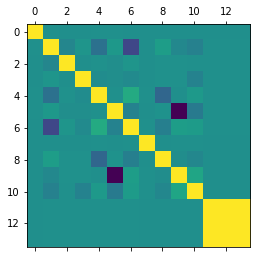

In [135]:
plt.matshow(data.corr())

Al analizar la matriz de correlación, acertamos al decir que las variables 'Annual_Premium' y 'Region_Code' son de las variables más correlacionadas que tenemos. 

In [81]:
import statsmodels.formula.api as smf

In [84]:
lm = smf.ols(formula = "Region_Code~Annual_Premium", data = data).fit()

In [85]:
lm.params

Intercept         26.637524
Annual_Premium    -0.000008
dtype: float64

In [86]:
lm.pvalues

Intercept         0.000000e+00
Annual_Premium    6.307707e-11
dtype: float64

In [87]:
lm.rsquared

0.00011209536968204148

In [88]:
lm.rsquared_adj

0.00010947172880260148

In [90]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Region_Code   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     42.73
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           6.31e-11
Time:                        22:05:14   Log-Likelihood:            -1.5250e+06
No. Observations:              381109   AIC:                         3.050e+06
Df Residuals:                  381107   BIC:                         3.050e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         26.6375      0.044    609.972      0.000      26.552      26.723
Annual_Premium -8.137e-06   1.24e-06     -6.536      0.000   -1.06e-05    -5.7e-06
==============================================================================
Omnibus:                    45583.089   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12867.815
Skew:                          -0.121   Prob(JB):                         0.00
Kurtosis:                       2.133   Cond. No.                     7.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
RC_pred = lm.predict(pd.DataFrame(data["Annual_Premium"]))
RC_pred

0         26.308331
1         26.364626
2         26.325908
3         26.404638
4         26.413776
            ...    
381104    26.392017
381105    26.311895
381106    26.351753
381107    26.274455
381108    26.297565
Length: 381109, dtype: float64

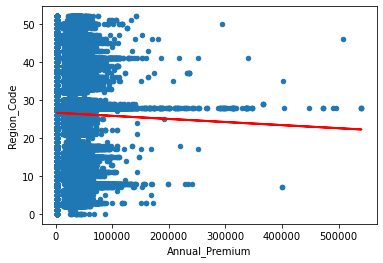

In [100]:
%matplotlib inline
data.plot(kind = "scatter", x = "Annual_Premium", y = "Region_Code")
plt.plot(pd.DataFrame(data["Annual_Premium"]), RC_pred, c = "red", linewidth = 2)

In [101]:
data["RC_pred"] = 26.637524 - 0.000008*data["Annual_Premium"]

In [102]:
data["RSE"] = (data["Region_Code"] - data["RC_pred"])**2

In [105]:
SSD = sum(data["RSE"])
SSD

66697840.80208433

In [106]:
RSE = np.sqrt(SSD/len(data)-2)
RSE

13.153322058251145

In [107]:
RC_m = np.mean(data["Region_Code"])
RC_m

26.388807401557035

In [108]:
error = RSE/RC_m
error

0.49844321716013024

(array([ 19361.,  50945.,  34453.,  16751.,  11538., 134444.,  29246.,
         30924.,  36238.,  17209.]),
 array([-26.616484 , -21.3047376, -15.9929912, -10.6812448,  -5.3694984,
         -0.057752 ,   5.2539944,  10.5657408,  15.8774872,  21.1892336,
         26.50098  ]),
 <BarContainer object of 10 artists>)

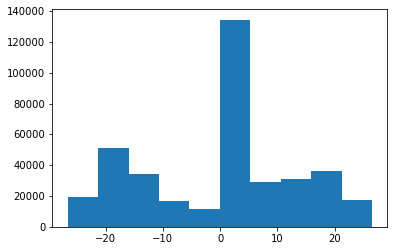

In [109]:
plt.hist((data["Region_Code"] - data["RC_pred"]))

In [110]:
0.49844321716013024*100

49.84432171601302

Tenemos un error bastante alto el cual es del 49.84 %, con lo cual veremos otra tecnica para minimizar esto. 
Una forma de intentar mejorar esto es intentar hacer una regresión lineal multiple

**Realice una prueba chi-cuadrado entre dos de sus variables categoricas. Concluya al respecto.**

In [136]:
import scipy.stats as ss


In [140]:
media, desviacion = ss.norm.fit(data["Region_Code"])

print(media)
print(desviacion)

26.388807401557035
13.229870668684972


In [141]:
def test_chicuadrado(data, N):
    n = data.count()
    freqs, edges, _ = ss.binned_statistic(data,data,statistic="count")
    def ei(i):
        return n*(N.cdf(edges[i])- N.cdf(edges[i-1]))
    expected = [ei(i) for i in range(1,len(edges))]
    return ss.chisquare(freqs,expected)